**Task-1: Prediction using Supervised ML**

**Author: Koduri Sai Madhav**

**Problem Statement: We need to predict the percentage of an student based on the no. of study hours. This task involves simple linear regreesion with just 2 variables.What will be predicted score if a student studies for 9.25 hrs/ day?**


In [ ]:
#Importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

**Step-1: Retriving the data from the source.**

In [ ]:
# Reading data from remote link
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(url)
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
student_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


**Step-2: Data Visualizing by plotting the data.**

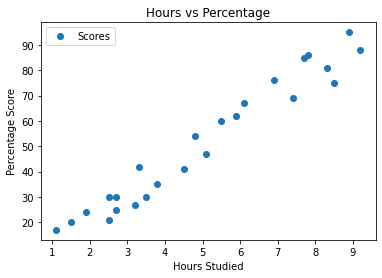

In [ ]:
# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**By observing the above graph which is a plot between number of Hours Studied on x-axis and Percentage Score on y-axis, we can assume that there is a positive linear relationship between the number of hours studied and percentage score.**

**Step-3: Data Preprocessing**

In [ ]:
X = student_data.iloc[:,0].values  
y = student_data.iloc[:,1].values  

**Step-4: Training the linear regression model**

In [ ]:
#Splitting the data into training and testing sets using train_test_split and training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
lr=LinearRegression()  
linear_reg_model=lr.fit(X_train.reshape(-1,1), y_train) 

**Step-5: Plotting the Regression Line.**

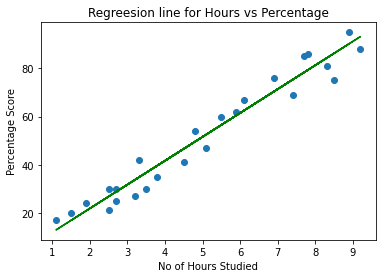

In [ ]:
# Plotting the regression line
reg_line = linear_reg_model.coef_*X+linear_reg_model.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, reg_line,color='green');
plt.title('Regreesion line for Hours vs Percentage')  
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

**Step-6:Making Predictions based on linear regression model**

In [ ]:
# Testing data
print(X_test.reshape(-1,1))
# Model Prediction 
y_pred = linear_reg_model.predict(X_test.reshape(-1,1))

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Step-7: Comparing the predicted result and the actual result.**

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#Estimating training and test score
print("Training Score:",linear_reg_model.score(X_train.reshape(-1,1),y_train))
print("Test Score:",linear_reg_model.score(X_test.reshape(-1,1),y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


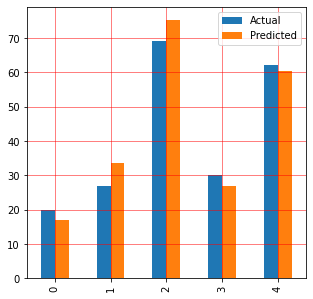

In [ ]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

**Predicting score of a student who studies 9.25 hrs/ day based on linear regression model**

In [ ]:
# Testing the model with given data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = linear_reg_model.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Step-8:Evaluating the model**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354
